# NAVGEM

This demonstrates how to use public data from the NAVGEM model from NOMADS or GODAE.

> Note: there are not .idx files provided, so you have to download the full file and generate the .idx file with wgrib2 (requires Linux).

## NAVGEM on NOMADS


In [9]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from paint.standard2 import cm_tmp, cm_wind
from herbie.toolbox import EasyMap, pc

from herbie import Herbie

In [43]:
H = Herbie("2024-01-18", model="navgem_nomads", fxx=6)

✅ Found ┊ model=navgem_nomads ┊ product=none ┊ 2024-Jan-18 00:00 UTC F06 ┊ GRIB2 @ local ┊ IDX @ None


In [44]:
H.PRODUCTS

{'none': ''}

In [45]:
H.SOURCES

{'nomads': 'https://nomads.ncep.noaa.gov/pub/data/nccf/com/fnmoc/prod/navgem.20240118/navgem_2024011800f006.grib2'}

In [46]:
# no index file available. Have to download the full file.
H.download()

PosixPath('/p/cwfs/blaylock/data/navgem_nomads/20240118/navgem_2024011800f006.grib2')

In [47]:
# Since we have download the full file and don't have an index,
# we need to filter by keys to open the variable we want.

ds = H.xarray(
    backend_kwargs={
        "filter_by_keys": {"shortName": "2t", "typeOfLevel": "heightAboveGround"}
    },
)
ds

/p/home/blaylock/BB_python/Herbie/herbie/core.py:1064: UserWarning: Will not remove GRIB file because it previously existed.
  warnings.warn("Will not remove GRIB file because it previously existed.")


<xarray.Dataset>
Dimensions:              (latitude: 361, longitude: 720)
Coordinates:
    time                 datetime64[ns] 2024-01-18
    step                 timedelta64[ns] 06:00:00
    heightAboveGround    float64 2.0
  * latitude             (latitude) float64 -90.0 -89.5 -89.0 ... 89.0 89.5 90.0
  * longitude            (longitude) float64 0.0 0.5 1.0 ... 358.5 359.0 359.5
    valid_time           datetime64[ns] ...
Data variables:
    t2m                  (latitude, longitude) float32 ...
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             fnmo
    GRIB_centreDescription:  US Navy - Fleet Numerical Oceanography Center
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US Navy - Fleet Numerical Oceanography Center
    model:                   navgem_nomads
    product:                 none
    description:             Navy Global Environment Model
    remote_grib:             /p/cwfs/blaylock/data/navgem_nomads/20240118/nav...
    local_grib:              /p/cwfs/blaylock/data/navgem_nomads/20240118/nav...
    search:            None

In [48]:
int(ds.step.dt.total_seconds() / 60 / 60)

6

Text(0.0, 1.0, 'NAVGEM_NOMADS: 00:00 UTC 18 Jan 2024 F006')

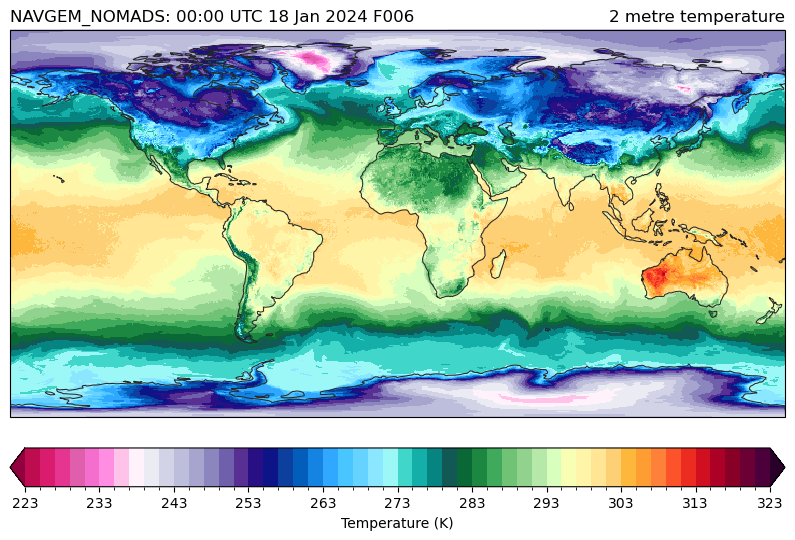

In [49]:
ax = EasyMap(crs=ds.herbie.crs, figsize=[10, 8]).ax
p = ax.pcolormesh(
    ds.longitude, ds.latitude, ds.t2m, transform=pc, **cm_tmp(units="K").cmap_kwargs
)
plt.colorbar(
    p, ax=ax, orientation="horizontal", pad=0.05, **cm_tmp(units="K").cbar_kwargs
)

ax.set_title(ds.t2m.GRIB_name, loc="right")
ax.set_title(
    f'{H.model.upper()}: {ds.time.dt.strftime("%H:%M UTC %d %b %Y").item()} F{int(ds.step.dt.total_seconds() / 60 / 60):03d}',
    loc="left",
)

After downloading the full file, you can create an index file. (Only possible if WGRIB2 is installed and in your path)


In [50]:
from herbie import wgrib2

In [51]:
wgrib2.create_inventory_file(H.grib)

PosixPath('/p/cwfs/blaylock/data/navgem_nomads/20240118/navgem_2024011800f006.grib2.idx')

In [52]:
H.inventory()

,grib_message,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time,search_this
0,1,421,150741.0,421-150741,2024-01-18,2024-01-18 06:00:00,ACPCP,surface,0-6 hour acc fcst,:ACPCP:surface:0-6 hour acc fcst
1,2,150742,296573.0,150742-296573,2024-01-18,2024-01-18 06:00:00,APCP,surface,0-6 hour acc fcst,:APCP:surface:0-6 hour acc fcst
2,3,296574,522814.0,296574-522814,2024-01-18,2024-01-18 06:00:00,TMP,max wind,6 hour fcst,:TMP:max wind:6 hour fcst
3,4,522815,791251.0,522815-791251,2024-01-18,2024-01-18 06:00:00,HGT,max wind,6 hour fcst,:HGT:max wind:6 hour fcst
4,5,791252,1110273.0,791252-1110273,2024-01-18,2024-01-18 06:00:00,PRES,max wind,6 hour fcst,:PRES:max wind:6 hour fcst
...,...,...,...,...,...,...,...,...,...,...
86,87,18256249,18609646.0,18256249-18609646,2024-01-18,2024-01-18 06:00:00,UGRD,10 m above ground,6 hour fcst,:UGRD:10 m above ground:6 hour fcst
87,88,18609647,18961671.0,18609647-18961671,2024-01-18,2024-01-18 06:00:00,VGRD,10 m above ground,6 hour fcst,:VGRD:10 m above ground:6 hour fcst
88,89,18961672,19336231.0,18961672-19336231,2024-01-18,2024-01-18 06:00:00,var discipline=0 center=58 local_table=0 parmc...,19.5 m above ground,6 hour fcst,:var discipline=0 center=58 local_table=0 parm...
89,90,19336232,19693176.0,19336232-19693176,2024-01-18,2024-01-18 06:00:00,UGRD,19.5 m above ground,6 hour fcst,:UGRD:19.5 m above ground:6 hour fcst


In [53]:
H.inventory().attrs

{'url': <_io.StringIO at 0x2b1a531ef010>,
 'source': 'generated',
 'description': 'Inventory index file for the GRIB2 file.',
 'model': 'navgem_nomads',
 'product': 'none',
 'lead_time': 6,
 'datetime': Timestamp('2024-01-18 00:00:00')}

In [54]:
H.xarray("TMP:2 m")

<xarray.Dataset>
Dimensions:              (latitude: 361, longitude: 720)
Coordinates:
    time                 datetime64[ns] 2024-01-18
    step                 timedelta64[ns] 06:00:00
    heightAboveGround    float64 2.0
  * latitude             (latitude) float64 -90.0 -89.5 -89.0 ... 89.0 89.5 90.0
  * longitude            (longitude) float64 0.0 0.5 1.0 ... 358.5 359.0 359.5
    valid_time           datetime64[ns] 2024-01-18T06:00:00
Data variables:
    t2m                  (latitude, longitude) float32 243.6 244.1 ... 248.9
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             fnmo
    GRIB_centreDescription:  US Navy - Fleet Numerical Oceanography Center
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US Navy - Fleet Numerical Oceanography Center
    model:                   navgem_nomads
    product:                 none
    description:             Navy Global Environment Model
    remote_grib:             /p/cwfs/blaylock/data/navgem_nomads/20240118/nav...
    local_grib:              /p/cwfs/blaylock/data/navgem_nomads/20240118/sub...
    search:            TMP:2 m

## NAVGEM on GODAE

NAVGEM is archived on [GODAE](https://usgodae.org/ftp/outgoing/fnmoc/models/navgem_0.5/).

The GRIB files are organized differently, and you have to specify the level and variable. Look at the [File Naming Convention](https://usgodae.org/docs/layout/mdllayout.pns.html) and [description of levels](https://usgodae.org/docs/layout/pn_level_type_tbl.pns.html).


In [1]:
from herbie import Herbie
import xarray as xr
import numpy as np

### 2-m air temperature

In [2]:
H = Herbie(
    "2023-02-13 12:00",
    model="navgem_godae",
    product="GMET",
    level="0105_000020-000000",
    variable="air_temp",
    overwrite=True,
)
H.grib

✅ Found ┊ model=navgem_godae ┊ product=GMET ┊ 2023-Feb-13 12:00 UTC F00 ┊ GRIB2 @ navgem ┊ IDX @ None


'https://usgodae.org/ftp/outgoing/fnmoc/models/navgem_0.5/2023/2023021312/US058GMET-GR1mdl.0018_0056_00000F0RL2023021312_0105_000020-000000air_temp'

In [3]:
# Download the file
my_file = H.download()

my_file, my_file.exists()

👨🏻‍🏭 Created directory: [/home/blaylock/data/navgem_godae/20230213]


(PosixPath('/home/blaylock/data/navgem_godae/20230213/US058GMET-GR1mdl.0018_0056_00000F0RL2023021312_0105_000020-000000air_temp'),
 True)

In [4]:
# Open data in xarray
ds = H.xarray()
ds

/home/blaylock/GITHUB/Herbie/herbie/core.py:1097: UserWarning: Will not remove GRIB file because it previously existed.
  warnings.warn("Will not remove GRIB file because it previously existed.")


<xarray.Dataset> Size: 1MB
Dimensions:              (latitude: 361, longitude: 720)
Coordinates:
    time                 datetime64[ns] 8B 2023-02-13T12:00:00
    step                 timedelta64[ns] 8B 00:00:00
    heightAboveGround    float64 8B 2.0
  * latitude             (latitude) float64 3kB -90.0 -89.5 -89.0 ... 89.5 90.0
  * longitude            (longitude) float64 6kB -0.5 0.0 0.5 ... 358.5 359.0
    valid_time           datetime64[ns] 8B ...
    gribfile_projection  object 8B None
Data variables:
    t2m                  (latitude, longitude) float32 1MB ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             fnmo
    GRIB_centreDescription:  US Navy - Fleet Numerical Oceanography Center
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US Navy - Fleet Numerical Oceanography Center
    model:                   navgem_godae
    product:                 GMET
    description:             Navy Global Environment Model
    remote_grib:             /home/blaylock/data/navgem_godae/20230213/US058G...
    local_grib:              /home/blaylock/data/navgem_godae/20230213/US058G...
    search:                  None

In [5]:
# Plot data
ax = EasyMap(crs=ds.herbie.crs, figsize=[10, 8]).ax
p = ax.pcolormesh(
    ds.longitude,
    ds.latitude,
    ds.t2m - 273.15,
    transform=pc,
    **cm_tmp(units="C").cmap_kwargs,
)
plt.colorbar(
    p, ax=ax, orientation="horizontal", pad=0.05, **cm_tmp(units="C").cbar_kwargs
)

ax.set_title(
    f"{ds.t2m.GRIB_name} {float(ds[ds.t2m.GRIB_typeOfLevel])} {str(ds[ds.t2m.GRIB_typeOfLevel].units)}",
    loc="right",
)
ax.set_title(
    f'{H.model.upper()}: {ds.time.dt.strftime("%H:%M UTC %d %b %Y").item()} F{int(ds.step.dt.total_seconds() / 60 / 60):03d}',
    loc="left",
)

NameError: name 'EasyMap' is not defined

### 500 mb U and V wind

In [6]:
wind = [
    Herbie(
        "2023-02-13 12:00",
        model="navgem_godae",
        product="GMET",
        level="0100_005000-000000",
        variable=variable,
    ).xarray()
    for variable in ["wnd_ucmp", "wnd_vcmp"]
]


ds_wind = xr.combine_by_coords(wind, combine_attrs="drop_conflicts")
ds_wind["wspd"] = np.sqrt(ds_wind.u**2 + ds_wind.v**2)
ds_wind

✅ Found ┊ model=navgem_godae ┊ product=GMET ┊ 2023-Feb-13 12:00 UTC F00 ┊ GRIB2 @ navgem ┊ IDX @ None


/home/blaylock/GITHUB/Herbie/herbie/core.py:1102: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


✅ Found ┊ model=navgem_godae ┊ product=GMET ┊ 2023-Feb-13 12:00 UTC F00 ┊ GRIB2 @ navgem ┊ IDX @ None


/home/blaylock/GITHUB/Herbie/herbie/core.py:1102: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


<xarray.Dataset> Size: 3MB
Dimensions:              (latitude: 361, longitude: 720)
Coordinates:
    time                 datetime64[ns] 8B 2023-02-13T12:00:00
    step                 timedelta64[ns] 8B 00:00:00
    isobaricInhPa        float64 8B 500.0
  * latitude             (latitude) float64 3kB -90.0 -89.5 -89.0 ... 89.5 90.0
  * longitude            (longitude) float64 6kB -0.5 0.0 0.5 ... 358.5 359.0
    valid_time           datetime64[ns] 8B 2023-02-13T12:00:00
    gribfile_projection  object 8B None
Data variables:
    u                    (latitude, longitude) float32 1MB -6.4 -6.5 ... -14.6
    v                    (latitude, longitude) float32 1MB 9.8 10.4 ... -16.7
    wspd                 (latitude, longitude) float32 1MB 11.7 12.26 ... 22.18
Attributes:
    GRIB_edition:            1
    GRIB_centre:             fnmo
    GRIB_centreDescription:  US Navy - Fleet Numerical Oceanography Center
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US Navy - Fleet Numerical Oceanography Center
    model:                   navgem_godae
    product:                 GMET
    description:             Navy Global Environment Model
    search:                  None

Text(0.0, 1.0, 'NAVGEM_GODAE: 12:00 UTC 13 Feb 2023 F000')

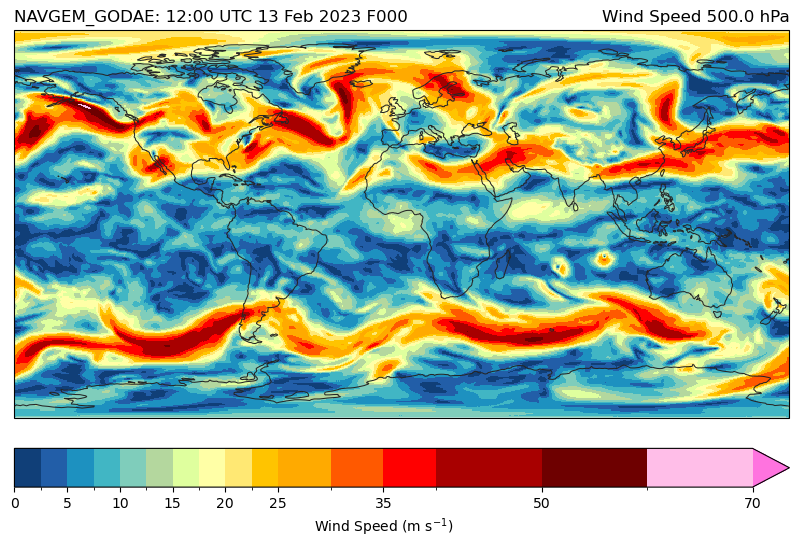

In [10]:
ax = EasyMap(crs=ds.herbie.crs, figsize=[10, 8]).ax
p = ax.pcolormesh(
    ds_wind.longitude,
    ds_wind.latitude,
    ds_wind.wspd,
    transform=pc,
    **cm_wind().cmap_kwargs,
)
plt.colorbar(p, ax=ax, orientation="horizontal", pad=0.05, **cm_wind().cbar_kwargs)

ax.set_title(
    f"Wind Speed {float(ds_wind[ds_wind.u.GRIB_typeOfLevel])} {str(ds_wind[ds_wind.u.GRIB_typeOfLevel].units)}",
    loc="right",
)
ax.set_title(
    f'{H.model.upper()}: {ds_wind.time.dt.strftime("%H:%M UTC %d %b %Y").item()} F{int(ds_wind.step.dt.total_seconds() / 60 / 60):03d}',
    loc="left",
)

### Data from NOGAPS model

In [11]:
H = Herbie(
    "2005-02-13 12:00",
    model="navgem_godae",
    product="GMET",
    level="0105_000020-000000",
    variable="air_temp",
    overwrite=True,
)
H.grib

✅ Found ┊ model=navgem_godae ┊ product=GMET ┊ 2005-Feb-13 12:00 UTC F00 ┊ GRIB2 @ nogaps ┊ IDX @ None


'https://usgodae.org/ftp/outgoing/fnmoc/models/nogaps/2005/2005021312/US058GMET-GR1mdl.0058_0240_00000F0RL2005021312_0105_000020-000000air_temp'

In [12]:
ds = H.xarray()
ds

/home/blaylock/GITHUB/Herbie/herbie/core.py:1102: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


👨🏻‍🏭 Created directory: [/home/blaylock/data/navgem_godae/20050213]


<xarray.Dataset> Size: 265kB
Dimensions:              (latitude: 181, longitude: 360)
Coordinates:
    time                 datetime64[ns] 8B 2005-02-13T12:00:00
    step                 timedelta64[ns] 8B 00:00:00
    heightAboveGround    float64 8B 2.0
  * latitude             (latitude) float64 1kB -90.0 -89.0 -88.0 ... 89.0 90.0
  * longitude            (longitude) float64 3kB -1.0 0.0 1.0 ... 357.0 358.0
    valid_time           datetime64[ns] 8B ...
    gribfile_projection  object 8B None
Data variables:
    t2m                  (latitude, longitude) float32 261kB ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             fnmo
    GRIB_centreDescription:  US Navy - Fleet Numerical Oceanography Center
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US Navy - Fleet Numerical Oceanography Center
    model:                   navgem_godae
    product:                 GMET
    description:             Navy Global Environment Model
    remote_grib:             /home/blaylock/data/navgem_godae/20050213/US058G...
    local_grib:              /home/blaylock/data/navgem_godae/20050213/US058G...
    search:                  None

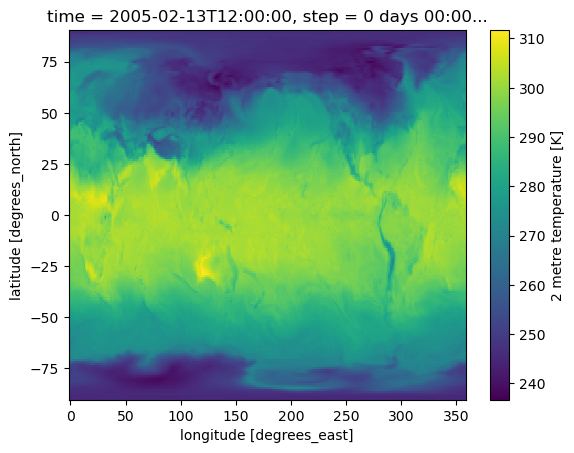

In [13]:
ds.t2m.plot()